# Import Dependencies

In [1]:
import dependencies
import soft_dependencies
import matplotlib.pyplot as plt

Python Version 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
Numpy Version 1.21.5
Scipy Version 1.7.3
Sklearn Version 1.0.2
Matplotlib Version 3.5.1
Pandas Version 1.4.2
Line Profiler Version 3.3.1
Memory Profiler Version 0.58.0


In [2]:
from Scripts.generate_data import generate_Ys
from Scripts.scBiGLasso import scBiGLasso
from Scripts.anBiGLasso import anBiGLasso
from Scripts.EiGLasso import EiGLasso

In [3]:
# For timing results
import timeit

In [4]:
%load_ext autoreload
%autoreload 2

# Time scBiGLasso and anBiGLasso
**Note:**

'Easy' data comes from precision matrices generated from an
inverse Wishart distribution with many degrees of freedom.
Empirically, scBiGLasso converges very quickly.

'Hard' data comes from precision amtrices generated from an
inverse Wishart distribution with minimal degrees of freedom.
Empirically, scBiGLasso takes a long time to converge.

In [15]:
def generate_timing_graph(
    sizes,
    attempts, 
    m,
    df_scale,
    include_sc=True,
    verbose=False
):
    if include_sc:
        times_sc = []
    times_an = []
    times_eig = []
    for size in sizes:
        if verbose:
            print(f"Starting {size=}")
        if include_sc:
            times_sc.append(0)
        times_an.append(0)
        times_eig.append(0)
        _, _, Ys = generate_Ys(
            m=m,
            n=(n:=size),
            p=(p:=size),
            expected_nonzero_psi=n**2 / 5,
            expected_nonzero_theta=p**2 / 5,
            structure="Kronecker Sum",
            df_scale=df_scale
        )
        def time_scBiGLasso():
            scBiGLasso(
                N = 100,
                eps = 10e-4,
                Ys = Ys,
                beta_1 = 0.01,
                beta_2 = 0.01,
                verbose = False
            )
        def time_anBiGLasso():
            anBiGLasso(
                Ys = Ys,
                beta_1 = 0.01,
                beta_2 = 0.01,
                B_approx_iters = 10
            )
        def time_EiGLasso():
            EiGLasso(
                Ys = Ys,
                beta_1 = 0.01,
                beta_2 = 0.01
            )
        if include_sc:
            timer = timeit.Timer(time_scBiGLasso)
            times_sc[-1] = timer.timeit(attempts) / attempts
        timer = timeit.Timer(time_anBiGLasso)
        times_an[-1] = timer.timeit(attempts) / attempts
        timer = timeit.Timer(time_EiGLasso)
        times_eig[-1] = timer.timeit(attempts) / attempts
        if verbose:
            if include_sc:
                print(
                    f"\tSc: {times_sc[-1]} Seconds"
                    + f"\n\tAn: {times_an[-1]} Seconds"
                    + f"\n\tEig: {times_eig[-1]} Seconds"
                )
            else:
                print(
                    f"\tAn: {times_an[-1]} Seconds"
                    + f"\n\tEig: {times_eig[-1]} Seconds"
                )
    if include_sc:
        return times_sc, times_an, times_eig
    else:
        return times_an, times_eig

### Large Sample

In [8]:
attempts = 10
print("Times on an 'easy' distribution")
sizes_for_easy = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sc_easy, an_easy, eig_easy = generate_timing_graph(
    sizes_for_easy,
    attempts,
    df_scale=10,
    m=100,
    verbose=True
)
print("Times on a 'hard' distribution")
sizes_for_hard = [10, 20, 30, 40, 50]
sc_hard, an_hard, eig_hard = generate_timing_graph(
    sizes_for_hard,
    attempts,
    df_scale=1,
    m=100,
    verbose=True
)

Times on an 'easy' distribution
Starting size=10
	Sc: 0.01878694170000017 Seconds
	An: 0.003967470899999626 Seconds
	Eig: 0.005921562500000732 Seconds
Starting size=20
	Sc: 0.036265399999999205 Seconds
	An: 0.009174870800001145 Seconds
	Eig: 0.0038018209000000524 Seconds
Starting size=30
	Sc: 0.07963388750000036 Seconds
	An: 0.020029116699998895 Seconds
	Eig: 0.0056289249999991854 Seconds
Starting size=40
	Sc: 0.10589076249999607 Seconds
	An: 0.05259180420000007 Seconds
	Eig: 0.011188099999998258 Seconds
Starting size=50
	Sc: 0.14013011250000318 Seconds
	An: 0.04955434159999754 Seconds
	Eig: 0.01919675839999968 Seconds
Starting size=60
	Sc: 0.17957202919999987 Seconds
	An: 0.06026288749999935 Seconds
	Eig: 0.024381449999998493 Seconds
Starting size=70
	Sc: 0.22069458330000202 Seconds
	An: 0.10056564589999653 Seconds
	Eig: 0.03906277090000003 Seconds
Starting size=80
	Sc: 0.2921455625000021 Seconds
	An: 0.1389631125000051 Seconds
	Eig: 0.04890420419999941 Seconds
Starting size=90
	Sc: 0

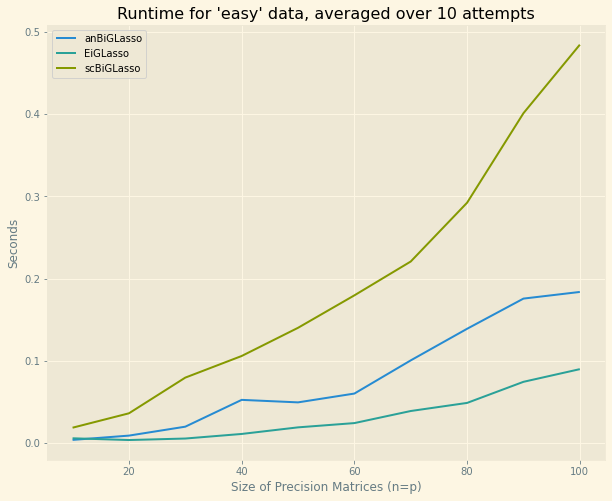

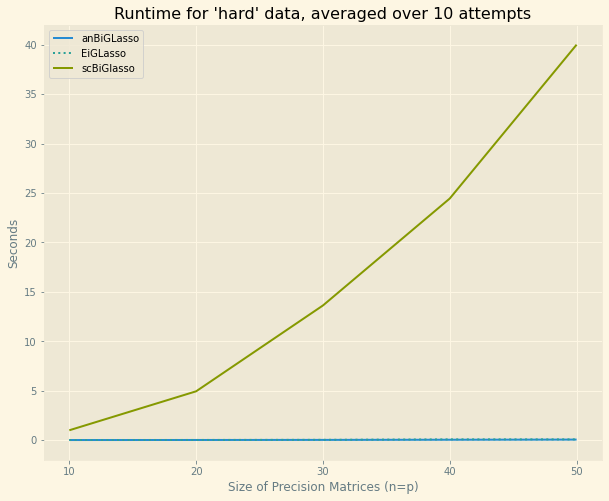

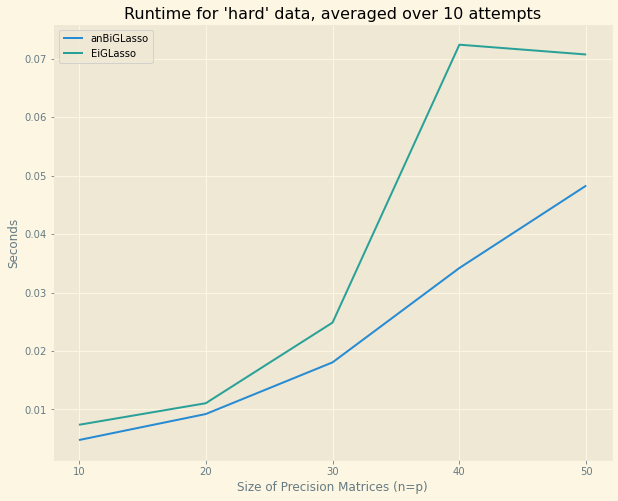

In [10]:
with plt.style.context('Solarize_Light2'):
        fig1, ax1 = plt.subplots(figsize=(10, 8))
        ax1.plot(sizes_for_easy, an_easy, label='anBiGLasso')
        ax1.plot(sizes_for_easy, eig_easy, label='EiGLasso')
        ax1.plot(sizes_for_easy, sc_easy, label='scBiGLasso')
        ax1.set_xlabel("Size of Precision Matrices (n=p)")
        ax1.set_ylabel("Seconds")
        ax1.set_title(f"Runtime for 'easy' data, averaged over {attempts} attempts")
        ax1.legend()
        fig1.savefig(f'../Plots/Runtimes Comparison/Compare Runtimes Easy Data Large Sample')
        fig2, ax2 = plt.subplots(figsize=(10, 8))
        ax2.plot(sizes_for_hard, an_hard, label='anBiGLasso')
        ax2.plot(sizes_for_hard, eig_hard, label='EiGLasso', linestyle=":")
        ax2.plot(sizes_for_hard, sc_hard, label='scBiGlasso')
        ax2.set_xlabel("Size of Precision Matrices (n=p)")
        ax2.set_ylabel("Seconds")
        ax2.set_xticks([10, 20, 30, 40, 50])
        ax2.set_title(f"Runtime for 'hard' data, averaged over {attempts} attempts")
        ax2.legend()
        fig2.savefig(f'../Plots/Runtimes Comparison/Compare Runtimes Hard Data Large Sample')
        fig3, ax3 = plt.subplots(figsize=(10, 8))
        ax3.plot(sizes_for_hard, an_hard, label='anBiGLasso')
        ax3.plot(sizes_for_hard, eig_hard, label='EiGLasso')
        ax3.set_xlabel("Size of Precision Matrices (n=p)")
        ax3.set_ylabel("Seconds")
        ax3.set_xticks([10, 20, 30, 40, 50])
        ax3.set_title(f"Runtime for 'hard' data, averaged over {attempts} attempts")
        ax3.legend()
        fig3.savefig(
            f'../Plots/Runtimes Comparison/Compare Runtimes Hard Data No scBiGLasso Large Sample'
        )

### Small Sample

In [12]:
print("Times on an 'easy' distribution")
sizes_for_easy = [10, 20, 30, 40, 50]
sc_easy, an_easy, eig_easy = generate_timing_graph(
    sizes_for_easy,
    attempts,
    df_scale=10,
    m=1,
    verbose=True
)
print("Times on a 'hard' distribution")
sizes_for_hard = [10, 20, 30, 40, 50]
sc_hard, an_hard, eig_hard = generate_timing_graph(
    sizes_for_hard,
    attempts,
    df_scale=1,
    m=1,
    verbose=True
)

Times on an 'easy' distribution
Starting size=10
	Sc: 1.1672237791000044 Seconds
	An: 0.0036773999999923034 Seconds
	Eig: 0.027862758400010533 Seconds
Starting size=20
	Sc: 5.5037056334 Seconds
	An: 0.007078708299991377 Seconds
	Eig: 0.01869930000000295 Seconds
Starting size=30
	Sc: 13.995320491600001 Seconds
	An: 0.013659479200009627 Seconds
	Eig: 0.05181157910001275 Seconds
Starting size=40
	Sc: 25.88393552499999 Seconds
	An: 0.019265487500001656 Seconds
	Eig: 0.10778002079998714 Seconds
Starting size=50
	Sc: 42.77639682920001 Seconds
	An: 0.023177974999998695 Seconds
	Eig: 0.18297048330000507 Seconds
Times on a 'hard' distribution
Starting size=10
	Sc: 0.6504257749999851 Seconds
	An: 0.0034502792000239424 Seconds
	Eig: 0.0318166083000051 Seconds
Starting size=20
	Sc: 3.044206229199972 Seconds
	An: 0.007604104100028053 Seconds
	Eig: 0.09980974579998474 Seconds
Starting size=30
	Sc: 7.442598524999994 Seconds
	An: 0.012319266700023946 Seconds
	Eig: 0.3655374750000192 Seconds
Starting s

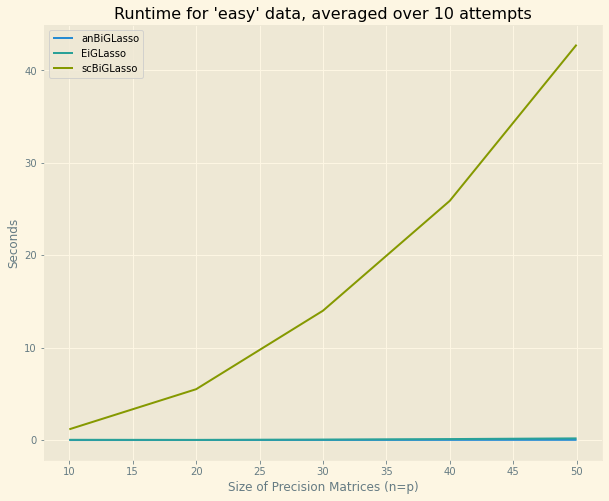

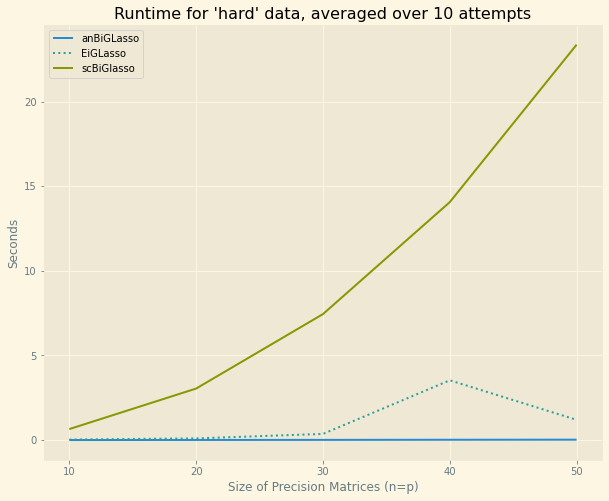

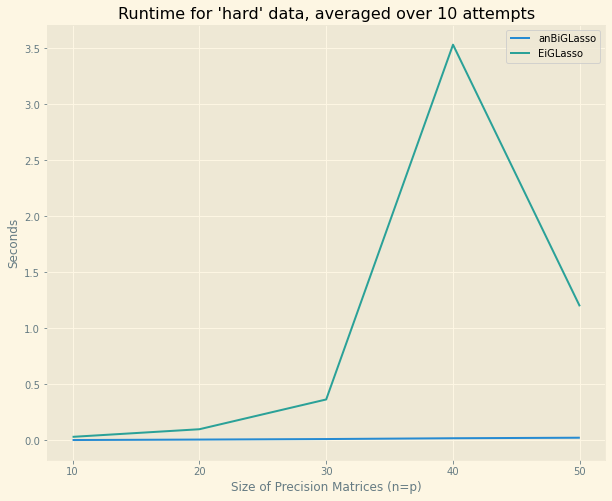

In [13]:
with plt.style.context('Solarize_Light2'):
        fig1, ax1 = plt.subplots(figsize=(10, 8))
        ax1.plot(sizes_for_easy, an_easy, label='anBiGLasso')
        ax1.plot(sizes_for_easy, eig_easy, label='EiGLasso')
        ax1.plot(sizes_for_easy, sc_easy, label='scBiGLasso')
        ax1.set_xlabel("Size of Precision Matrices (n=p)")
        ax1.set_ylabel("Seconds")
        ax1.set_title(f"Runtime for 'easy' data, averaged over {attempts} attempts")
        ax1.legend()
        fig1.savefig(f'../Plots/Runtimes Comparison/Compare Runtimes Easy Data Small Sample')
        fig2, ax2 = plt.subplots(figsize=(10, 8))
        ax2.plot(sizes_for_hard, an_hard, label='anBiGLasso')
        ax2.plot(sizes_for_hard, eig_hard, label='EiGLasso', linestyle=":")
        ax2.plot(sizes_for_hard, sc_hard, label='scBiGlasso')
        ax2.set_xlabel("Size of Precision Matrices (n=p)")
        ax2.set_ylabel("Seconds")
        ax2.set_xticks([10, 20, 30, 40, 50])
        ax2.set_title(f"Runtime for 'hard' data, averaged over {attempts} attempts")
        ax2.legend()
        fig2.savefig(f'../Plots/Runtimes Comparison/Compare Runtimes Hard Data Small Sample')
        fig3, ax3 = plt.subplots(figsize=(10, 8))
        ax3.plot(sizes_for_hard, an_hard, label='anBiGLasso')
        ax3.plot(sizes_for_hard, eig_hard, label='EiGLasso')
        ax3.set_xlabel("Size of Precision Matrices (n=p)")
        ax3.set_ylabel("Seconds")
        ax3.set_xticks([10, 20, 30, 40, 50])
        ax3.set_title(f"Runtime for 'hard' data, averaged over {attempts} attempts")
        ax3.legend()
        fig3.savefig(
            f'../Plots/Runtimes Comparison/Compare Runtimes Hard Data No scBiGLasso Small Sample'
        )

### Small Sample, just an and eig

In [17]:
attempts = 25
print("Times on an 'easy' distribution")
sizes_for_easy = [50, 100, 150, 200, 250, 300]
an_easy, eig_easy = generate_timing_graph(
    sizes_for_easy,
    attempts,
    df_scale=10,
    m=1,
    verbose=True,
    include_sc=False
)
print("Times on a 'hard' distribution")
sizes_for_hard = [50, 100, 150, 200, 250, 300]
an_hard, eig_hard = generate_timing_graph(
    sizes_for_hard,
    attempts,
    df_scale=1,
    m=1,
    verbose=True,
    include_sc=False
)

Times on an 'easy' distribution
Starting size=50
	An: 0.026146161679971556 Seconds
	Eig: 0.16722501000000192 Seconds
Starting size=100
	An: 0.08492162168000504 Seconds
	Eig: 0.7715499666799951 Seconds
Starting size=150
	An: 0.27858363663999625 Seconds
	Eig: 1.974818356680007 Seconds
Starting size=200
	An: 0.2946798300000228 Seconds
	Eig: 4.436087480000023 Seconds
Starting size=250
	An: 0.6670597050000288 Seconds
	Eig: 7.986298754999989 Seconds
Starting size=300
	An: 0.7289236583599995 Seconds
	Eig: 12.834746676680005 Seconds
Times on a 'hard' distribution
Starting size=50
	An: 0.027713401680011886 Seconds
	Eig: 1.4525562250000075 Seconds
Starting size=100
	An: 0.06827527667999675 Seconds
	Eig: 4.370204543319996 Seconds
Starting size=150
	An: 0.23180508832003396 Seconds
	Eig: 15.848368463359984 Seconds
Starting size=200
	An: 0.3259108600000036 Seconds
	Eig: 83.75554282831999 Seconds
Starting size=250
	An: 0.6288829550000082 Seconds
	Eig: 27.895062143319993 Seconds
Starting size=300
	An:

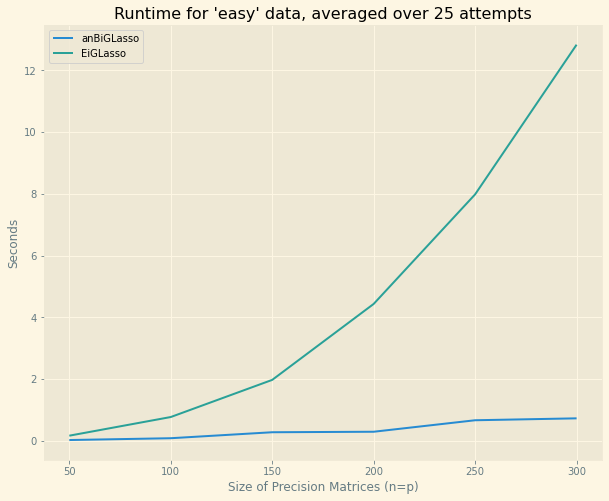

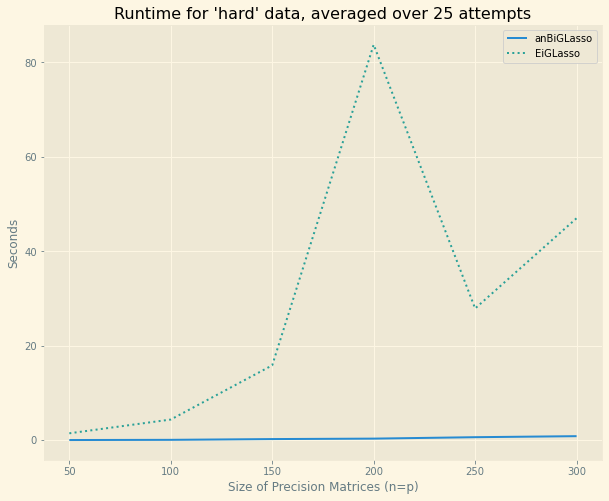

In [20]:
with plt.style.context('Solarize_Light2'):
        fig1, ax1 = plt.subplots(figsize=(10, 8))
        ax1.plot(sizes_for_easy, an_easy, label='anBiGLasso')
        ax1.plot(sizes_for_easy, eig_easy, label='EiGLasso')
        ax1.set_xlabel("Size of Precision Matrices (n=p)")
        ax1.set_ylabel("Seconds")
        ax1.set_title(f"Runtime for 'easy' data, averaged over {attempts} attempts")
        ax1.legend()
        fig1.savefig(f'../Plots/Runtimes Comparison/Compare Runtimes Easy Data Small Sample No sc')
        fig2, ax2 = plt.subplots(figsize=(10, 8))
        ax2.plot(sizes_for_hard, an_hard, label='anBiGLasso')
        ax2.plot(sizes_for_hard, eig_hard, label='EiGLasso', linestyle=":")
        ax2.set_xlabel("Size of Precision Matrices (n=p)")
        ax2.set_ylabel("Seconds")
        ax2.set_title(f"Runtime for 'hard' data, averaged over {attempts} attempts")
        ax2.legend()
        fig2.savefig(f'../Plots/Runtimes Comparison/Compare Runtimes Hard Data Small Sample No sc')